## 디지털 이미지
-----
###  컬러스페이스
* 인간은 R, G, B 세개의 색을 감지하는 수용체가 가장 많다. 
* 보통 컬러스페이스의 채널은 R,G,B로 구성되는 편

1. raster or bitmap

각 색상별(RGB)로 8비트 사용, 0~255사이 값으로 색의 감도 표현

2. 벡터

상대적인 점과 선위 위치를 방정식으로 기록했다가, 확대/축소에 따라 화면의 각 화소에 어떻게 표현될지 재계산

3. YUV방식

흑백 채널에 그보다 1/4해상도의 두 색상 채녈 덧붙여서 컬러 화면 송출

4. HSV(Hue 색상, Saturation 채도, Value 명도)

디지털 화면에서 색감을 수치적으로 조작할때 더 직관적으로 이해가능

5. CMYK

검은색을 추가하여 인쇄시 검은색 조합에서 발생하는 RGB색 잉크의 낭비 방지


### 사진 저장 형식

1. jpg

근처에 있는 화소들을 묶어 비슷한색들을 뭉뚱그리는 방식으로 이미지 압축
-> 색상정보 손실 발생으로 디지털 풍화 현상 발생


2. PNG
이미지에 사용된 색상을 미리 정의해두고 그를 참조하는 팔레트 방식 사용 
해상도 보다도 색상의 수가 용량과 직결된다.


3. GIF
이미지 내에 여러 프레임을 두어 이를 움직이게 만들 수 있고, 256개의 색상만 기억할 수 있는 팔레트 방식

## Pillow
-----
### PIL(Python Image Library)

* 2011년 마지막 커밋 이후로 개발 중단.
* Pillow가 이를 계승한다.


## Pillow로 CIFAR-100 데이터 전처리하기
-----

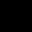

In [2]:
# 모든 픽셀 black
import numpy as np
from PIL import Image

data = np.zeros([32, 32, 3], dtype=np.uint8)
image = Image.fromarray(data, 'RGB')
image

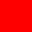

In [3]:
# 모든 픽셀 red
data[:, :] = [255, 0, 0]
image = Image.fromarray(data, 'RGB')
image

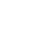

In [9]:
data[:, :]=  [255,255,255]
image = Image.fromarray(data, 'RGB')
image

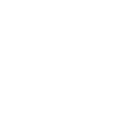

In [13]:
data1 = np.zeros([128,128,3], dtype=np.uint8)
data1[:, :] = [255,255,255]
image = Image.fromarray(data1, 'RGB')
image

### 연습용 이미지로 width와 height 출력, save()로 jpg 파일포멧으로 저장


In [1]:
#- 문제 2 -#
from PIL import Image
import os

# 연습용 파일 경로
image_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/pillow_practice.png'

# 이미지 열기
with Image.open(image_path) as im:
    print(im.size)   # width와 height 출력
    converted_im = im.convert("RGB")  
    converted_im.save(f'{image_path[:-4]}.jpg')    # JPG 파일 형식으로 저장해보기

TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'

### resize()

In [ ]:
#- 문제 3 -# 
# [[YOUR CODE]]
resized_im = converted_im.resize((100,200))
resized_im.save(f'{image_path[:-4]}_resized.jpg')

### crop()

In [ ]:
#- 문제 4 -#
box = (300,100,600,400)
croped_im = converted_im.crop(box)
croped_im.save(f'{image_path[:-4]}_croped.jpg')

## CIFAR-100 데이터를 Pillow활용해 전처리
-----

In [ ]:
import os
import pickle
from PIL import Image

dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')

print(type(train))
# print(train)   # 혹시 내용이 궁금하다면 주석을 풀고 실행해 보세요.

키를 보자!

In [ ]:
train.keys()

특이사항으로는 각 키들이 문자열(str)이 아닌 b로 시작하는 bytes로 되어있다는 점입니다. 이에 유의하면서 일단 파일명(b'filenames')들을 한번 살펴봅시다.

In [ ]:
type(train[b'filenames'])

In [ ]:
train[b'filenames'][0:5]

> Data: a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.

In [ ]:
train[b'data'][0:5]

In [ ]:
train[b'data'][0].shape

이 숫자와 위 본문을 보니, 3072라는 숫자는 빨강 초록 파랑 3채널 X 1024(=32 * 32)씩 각 화소에 해당하는 것 같습니다. 그렇다면 이 Numpy 배열을 잘 reshape하면 이미지 파일 원본이 복구된다는 뜻입니다. 그럼 (32, 32, 3)으로 reshape한 후 이미지를 화면에 출력해 봅시다.

주의해야 할 게 하나 있습니다. 위에 언급된 바를 상기해 보면, 3072바이트의 이미지 데이터는 앞 1024바이트는 빨강(R), 그다음 1024는 녹색(G), 마지막 1024는 파랑(B)으로 되어 있습니다. RGB 순서가 맞는 것은 다행이지만, 그렇다고 그냥 모양만 맞추어 reshape하면 안 됩니다. 1024를 32X32에 채우는 것을 3번 반복하는 방식의 reshape이어야 합니다. 이렇게 앞선 차원부터 데이터를 채우는 방식의 reshape를 위해 np.reshape에는 order라는 인자가 있습니다. 이 값을 F로 주면 원하는 형태로 진행됩니다.



In [ ]:
image_data = train[b'data'][0].reshape([32, 32, 3], order='F')   # order를 주의하세요!!
image = Image.fromarray(image_data)    # Pillow를 사용하여 Numpy 배열을 Image객체로 만들어서
image    # 화면에 띄워 봅시다!!

어떻습니까? 사이즈는 작지만 멋진 이미지가 나온 것 같습니다.

그런데 눈썰미가 좋으신 분이라면 갸우뚱하실 것입니다. 이미지의 X축과 Y축이 뒤집어져 나오고 있습니다. 축을 바꿔주는 작업이 필요합니다.
여기에는 np.swapaxes(0, 1)이 유용합니다.

In [ ]:
image_data = image_data.swapaxes(0, 1)
image = Image.fromarray(image_data)
image

자, 이렇게 CIFAR-100의 데이터셋 원본을 분석해서 이미지 파일을 뽑아내는 것까지 진행해 보았습니다. 그러나 우리는 이미지 파일을 실제 파일처럼 만들어 놓고 싶습니다. 데이터셋에 파일명과 파일 데이터 배열이 순서를 따라 저장되어 있는 것을 확인하였으니, 차례차례 Numpy 배열로 읽어서 이를 이미지 파일로 저장해 주는 것은 이미 배운 내용으로 충분할 것 같습니다.

그럼 아래 내용을 스스로 완성해 보세요.

(참고) tqdm을 사용하면 반복 작업의 진행 상황을 시각화해서 체크해 볼 수 있습니다. (50000장 이여서 시간이 30분가량 소요될 수도 있습니다!)

In [ ]:
import os
import pickle
from PIL import Image
import numpy
from tqdm import tqdm

dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

# image를 저장할 cifar-100-python의 하위 디렉토리(images)를 생성합니다. 
images_dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/cifar-images'
if not os.path.exists(images_dir_path):
    os.mkdir(images_dir_path)  # images 디렉토리 생성

# 32X32의 이미지 파일 50000개를 생성합니다. 
with open(train_file_path, 'rb') as f:              # 'rb' 옵션!!
    train = pickle.load(f, encoding='bytes')        # byte 인코딩된 pickle 파일 로드
    for i in tqdm(range(len(train[b'filenames']))): # tqdm으로 반복작업 진행상황 시각화
        filename = train[b'filenames'][i].decode()  # i번째 이미지 file이름 decode해 할당 
        data = train[b'data'][i].reshape([32,32,3], order='F') # order는 index ord이고 'F'는 Fortran like index order\
        img = Image.fromarray(data.swapaxes(0,1))   
        img.save(f'{images_dir_path}/cifar_00{i}.jpg')


## OpenCV
----- 
OpenCV(튜토리얼)는 오픈소스로 제공되는 컴퓨터 비전용 라이브러리인데요. C++, Python, Java, MATLAB 등 다양한 언어에서 호출하여 사용할 수 있으며, 영상 처리에 대한 다양한 고급 기능들이 사용하기 쉽도록 구현되어 있습니다

파이썬 튜토리얼 페이지에 들어가면 여러 가지 고급 예제들이 친절하게 설명되어 있는데, 우리는 이 중에 이미지에서 특정 색을 가진 영역만 추출하는 예제를 한번 살펴보겠습니다.

Changing Colorspaces

Pillow의 실습에서 보았든, 이미지는 결국 [너비, 높이, 채널] 형태를 가지는 배열이고, 컴퓨터 비전이란 결국 이러한 배열 형태의 데이터를 처리하는 것이 중요한 분야라는 것을 배웠습니다.

이미지의 내용 중 우리가 관심 있는 부분이 특정 색을 가지고 있다면, 이 정보를 통해 원하는 부분을 배경을 구분하고, 원하는 부분만 따로 떼어낼 수 있습니다. 이 예제에서는 이미지를 읽어 들이고, 파란색을 찾기 쉽도록 컬러스페이스를 BGR(RGB)에서 HSV로 변환한 뒤, 해당 색상과 맞는 영역만 표시하는 작업이 진행됩니다.

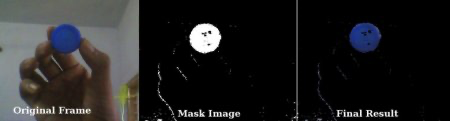content img
[출처 : https://docs.opencv.org/master/df/d9d/tutorial_py_colorspaces.html]   
❗ 주의: OpenCV에서는 RGB가 아닌 BGR 순서를 사용합니다


### 아래 코드를 파악해보자

In [ ]:
import os
import cv2 as cv
import numpy as np
from  matplotlib import pyplot as plt
%matplotlib inline

img_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cv_practice.png'
img = cv.imread(img_path)

# Convert BGR to HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# define range of blue color in HSV
lower_blue = np.array([100,100,100])
upper_blue = np.array([130,255,255])

# Threshold the HSV image to get only blue colors
mask = cv.inRange(hsv, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res = cv.bitwise_and(img,img, mask= mask)

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))
plt.show()

### 코드설명

In [4]:
import cv2 as cv
import numpy as np

SyntaxError: invalid syntax (<ipython-input-4-4581470aa283>, line 3)

OpenCV는 ```pip```으로 설치 시 ```opencv-python```이라는 이름으로 설치해야 하는데, ```import```할 때는 cv2라는 이름을 씁니다. 하지만 실제 최신 버전은 4.x대입니다. 복잡하지만 여러 가지 역사적인 사정이 겹쳐서 이렇게 되었습니다.

OpenCV와 함께, 숫자 배열을 처리하는데 궁합이 잘 맞는 Numpy도 불러옵니다. 생각해 보면 이미지 데이터는 숫자 행렬입니다. 예를 들어 가로세로 각 32 픽셀의 이미지가 있다면, 이는 32x32 행렬이고, 컬러 이미지의 경우 각 픽셀마다 RGB에 각각 해당하는 세 개의 숫자가 있기에, 32x32x3의 배열이 됩니다.

In [ ]:
img_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cv_practice.png'
img = cv.imread(img_path)

```imread``` 함수를 호출했습니다. 무엇을 하는 함수일까요? 한번 [OpenCV 공식 문서화 사이트](https://docs.opencv.org/4.5.2/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56)를 참조해봅시다.

문서화 페이지가 뭔가 많이 복잡하지요? 사실 알고 보면 OpenCV는 Python 전용으로 개발된 것이 아니라 C++, Java, Matlab 등에서 함께 사용이 가능하도록 만들어졌는데요. 모든 언어에 대해 문서화를 하나로 통합하여 제공하기에 그렇답니다. 😢

> The function imread loads an image from the specified file and returns it. If the image cannot be read (because of missing file, improper permissions, unsupported or invalid format), the function returns an empty matrix ( Mat::data==NULL ).

간단히 해석해보면, ```imread```는 말 그대로 파일로부터 이미지를 읽어와 반환해 주는 함수입니다.

In [ ]:
# Convert BGR to HSV
hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)

```cvtColor```은 컬러 스페이스 변환(convert)을 위한 함수입니다. 문서를 읽으며 직접 이해해 보셔도 좋습니다.

[OpenCV: Color Space Conversions](https://docs.opencv.org/master/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab)

이제 이어지는 다음 부분이 중요합니다.

In [5]:
# define range of blue color in HSV
lower_blue = np.array([100,100,100])
upper_blue = np.array([130,255,255])

# Threshold the HSV image to get only blue colors
mask = cv.inRange(hsv, lower_blue, upper_blue)

NameError: name 'np' is not defined

숫자로 파란색이라는 부분을 정의하고, 이 값들을 기준으로 이미지에서 마스크를 생성하는 과정입니다. 여기서 마스크란 수채화를 그리거나 인테리어 공사 중 실리콘을 바를 때 사용하는 마스킹 테이프의 역할과 동일합니다. 우리가 원하는 부분만을 떼어낼 수 있도록 하는 역할입니다.

위 코드에서는 HSV 색 공간에서 색상(Hue) 값 110\~130 사이, 채도(Saturation) 및 명도(Value) 값 50\~255 사이의 색들을 파란색이라고 정의하고 있습니다. 그리고 아까 frame 영상을 변환한 hsv에다가 이 기준들(lower_blue, upper_blue)를 적용하여, 해당하는 픽셀들에는 1, 그렇지 않은 픽셀들에는 0을 찍어놓은 배열을 반환하는 것이 cv.inRange()의 역할입니다.

즉, 우리가 가로 400, 세로 300 픽셀짜리 이미지를 받았었다면, frame과 hsv는 각각 픽셀 당 BGR, HSV 세 개의 색상 채널별 값을 가질 테기 때문에, 400 * 300 * 3의 크기를 갖는 배열이었고, mask는 픽셀마다 1 또는 0만을 값으로 가졌기에 400 * 300 (* 1)의 크기를 갖게 됩니다.

아래 이미지의 왼쪽 중 original frame으로 mask를 만든 뒤 1을 흰색으로, 0을 검정으로 표시한다면, 아래 이미지의 가운데에 있는 mask image와 동일하게 됩니다.

그럼 이제 오른쪽처럼 선택한 부분만 오려내야겠죠? ✂

In [ ]:
# Bitwise-AND mask and original image
res = cv.bitwise_and(frame,frame, mask= mask)

cv.bitwise_and()에 대한 설명은 [여기](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga60b4d04b251ba5eb1392c34425497e14https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga60b4d04b251ba5eb1392c34425497e14)에 있습니다. 좀 복잡하니 한번 슬쩍만 보고 오세요.

결국 이미지 두 장을 받아서 AND 비트 연산을 한다는 건데, 우리는 이 기능이 필요한 게 아니니 두 장 다 같은 이미지(frame, frame)를 넣어서 결국 동일한 이미지가 나오게 합니다. 대신 중요한 mask를 같이 넣어줘서, 해당 영역만 따오도록 합니다. 따온 영역은 위 공식 문서 페이지의 함수 설명에 따라 dst가 주어진다면 그 위에, 아니면 새로 빈 검정색 영역 위에 이미지를 만들고 반환합니다.

남은 부분은 직관적입니다.

In [ ]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))
plt.show()

이전 스텝에서 OpenCV에서는 RGB가 아닌 BGR 순서를 사용하다고 했던 말 기억나시죠? 따라서 plt 로 이미지를 보여줄 땐 cv.cvtColor(res, cv.COLOR_BGR2RGB) 함수를 통해, cv 이미지 객체의 컬러를 변환해 줘야 합니다.

각각 카메라에서 받아온 이미지 frame, 파란색인 영역만 골라낸 마스크 mask, 그리고 이미지에 마스크를 적용한 결과 res를 표시하도록 합니다.

혹은, 굳이 plt 로 보여주지 않고 cv 로 이미지를 띄우는 방법도 있습니다. cv.imshow(res) 도 PIL.Image.show(), plt.imshow()와 마찬가지로 이미지를 화면에 표시해 줍니다.

## CIFAR-100 이미지중 비슷한 이미지 찾아내기
-----

### 참고자료
* [Basic Image Manipulations in Python and OpenCV: Resizing (scaling), Rotating, and Cropping - PyImageSearch](https://www.pyimagesearch.com/2014/01/20/basic-image-manipulations-in-python-and-opencv-resizing-scaling-rotating-and-cropping/)

* [Clever Girl: A Guide to Utilizing Color Histograms for Computer Vision and Image Search Engines - PyImageSearch](https://www.pyimagesearch.com/2014/01/22/clever-girl-a-guide-to-utilizing-color-histograms-for-computer-vision-and-image-search-engines/)

* [Hobbits and Histograms - A How-To Guide to Building Your First Image Search Engine in Python - PyImageSearch](https://www.pyimagesearch.com/2014/01/27/hobbits-and-histograms-a-how-to-guide-to-building-your-first-image-search-engine-in-python/)

<br>

우리는 OpenCV에서 제공하는 기능 중에서 이미지에서 색상 히스토그램을 추출하고, 이를 서로 비교하는 기능들을 불러 사용해보겠습니다. 히스토그램이란, 이미지에서 픽셀 별 색상 값의 분포라고 볼 수 있습니다. 즉, 우리는 이러한 히스토그램을 통해, 각 이미지의 색상 분포를 비교하여 서로 유사한 이미지를 판단하는 척도로 사용할 예정입니다.

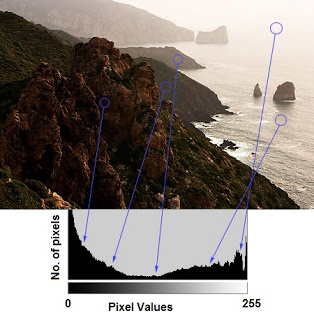
[출처 : https://docs.opencv.org/master/d1/db7/tutorial_py_histogram_begins.html]
위의 예시는 이미지를 흑백으로 변환했을 때 밝기에 따른 히스토그램이지만, 우리는 RGB 각 채널별 분포를 사용하려 합니다. 또한, 0\~255 사이 각 값에 해당하는 픽셀의 개수를 일일이 저장하기에는 계산량이 많아지므로, 단순화의 측면에서 이를 4개 구간(0\~63, 64\~127, 128\~191, 192\~255)로 나누어 픽셀 수를 세기로 합니다.

우리가 사용할 OpenCV 자체는 C++로 구현되어 있고, 이를 파이썬에서 불러 쓸 수 있도록 하는 패키지인 opencv-python를 설치해야 합니다. 또한 히스토그램을 실제로 화면에 표시하기 위해 matplotlib도 설치되어야 합니다.

물론 클라우드에는 이미 설치돼있으니, LMS에서는 굳이 하실 필요 없습니다. 나중에 스스로 설치를 하고 싶을 땐 아래 명령어를 실행하시면 됩니다.

In [ ]:
$ pip install opencv-python matplotlib

위에서 저장해둔 CIFAR-100 이미지 중 하나를 골라서, 아래 OpenCV 예제 페이지의 Plotting Histograms 중 Using Matplotlib 내 색상별 히스토그램을 그리는 코드를 참조하여 히스토그램을 그려봅시다.

In [6]:
import os
import pickle
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from PIL import Image

# 전처리 시 생성했던 디렉토리 구조
dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/'
train_file_path = os.path.join(dir_path, 'train')
images_dir_path = os.path.join(dir_path, 'cifar-images')

TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'

In [ ]:
# 파일명을 인자로 받아 해당 이미지 파일과 히스토그램을 출력해 주는 함수
def draw_color_histogram_from_image(file_name):
    image_path = os.path.join(images_dir_path, file_name)
    # 이미지 열기
    img = Image.open(image_path)
    cv_image = cv2.imread(image_path)

    # Image와 Histogram 그려보기
    f=plt.figure(figsize=(10,3))
    im1 = f.add_subplot(1,2,1)
    im1.imshow(img)
    im1.set_title("Image")

    im2 = f.add_subplot(1,2,2)
    color = ('b','g','r')
    for i,col in enumerate(color):
        # image에서 i번째 채널의 히스토그램을 뽑아서(0:blue, 1:green, 2:red)
        histr = cv2.calcHist([cv_image],[i],None,[256],[0,256])   
        im2.plot(histr,color = col)   # 그래프를 그릴 때 채널 색상과 맞춰서 그립니다.
    im2.set_title("Histogram")

In [ ]:
draw_color_histogram_from_image('adriatic_s_001807.png')

## 설계
----- 

* 프로그램이 실행된다.

<br>

* ``` build_histogram_db()```

  * CIFAR-100 이미지들을 불러온다.
  * CIFAR-100 이미지들을 하나하나 히스토그램으로 만든다.
  * 이미지 이름을 키로 하고, 히스토그램을 값으로 하는 딕셔너리 ```histogram_db```를 반환한다.
  
<br>  

* CIFAR-100 히스토그램 중 입력된 이미지 이름에 해당하는 히스토그램을 입력 이미지로 선택하여 target_histogram이라는 변수명으로 지정한다.   
<br>

* ```search()```

  * 입력 이미지 히스토그램 ```target_histogram```와 전체 검색 대상 이미지들의 히스토그램을 가진 딕셔너리 histogram_db를 입력으로 받는다.
  * OpenCV의 ```compareHist()``` 함수를 사용하여 입력 이미지와 검색 대상 이미지 하나하나의 히스토그램 간 유사도를 계산한다. 결과는```result```라는 이름의 딕셔너리로, 키는 이미지 이름, 값은 유사도로 한다.
  * 계산된 유사도를 기준으로 정렬하여 순서를 매긴다.
  * **유사도 순서상으로 상위 5개 이미지만 골라서 ```result```에 남긴다.**
  
<br>  
  
* 고른 이미지들을 표시한다.

<br>

* 프로그램이 종료된다.

## 코드 구현
----- 

### ```get_histogram()``` 

In [ ]:
def get_histogram(image):
    histogram = []

    # Create histograms per channels, in 4 bins each.
    for i in range(3):
        channel_histogram = cv2.calcHist([image],[i],None,[4],[0,256]) 
        histogram.append(channel_histogram)
    histogram = np.concatenate(histogram)
    histogram = cv2.normalize(histogram, histogram)

    return histogram

In [13]:
# get_histogram() 확인용 코드
filename = train[b'filenames'][0].decode()
file_path = os.path.join(images_dir_path, filename)
image = cv2.imread(file_path)
histogram = get_histogram(image)
histogram

###  ```build_histogram_db()```

In [ ]:
import os
import pickle
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

def build_histogram_db():
    histogram_db = {}

    #디렉토리에 모아 둔 이미지 파일들을 전부 리스트업합니다. 
    path = images_dir_path
    file_list = os.listdir(images_dir_path)

    # [[YOUR CODE]]
    for filename in tqdm(file_list):
        image = cv2.imread(f'{path}/{filename}')
        histogram_db[f'{filename}'] = get_histogram(image)

    return histogram_db

In [ ]:
# build_histogram_db() 확인용 코드
histogram_db = build_histogram_db()
histogram_db['adriatic_s_001807.png']

### ```get_target_histogram()```

In [ ]:
def get_target_histogram():
    filename = input("이미지 파일명을 입력하세요: ")
    if filename not in histogram_db:
        print('유효하지 않은 이미지 파일명입니다.')
        return None
    return histogram_db[filename]

In [ ]:
# get_target_histogram() 확인용 코드
target_histogram = get_target_histogram()
target_histogram

### ```search()```

In [ ]:
def search(histogram_db, target_histogram, top_k=5):
    results = {}
    # Calculate similarity distance by comparing histograms.
    for filename, histogram in tqdm(histogram_db.items()):
        results[filename]  = cv2.compareHist(target_histogram,
                                             histogram,
                                             method=cv2.HISTCMP_CHISQR)
    results = dict(sorted(results.items(), key=lambda item: item[1])[:top_k])
   
    return results

In [ ]:
# search() 확인용 코드
result = search(histogram_db, target_histogram)
result

### ```show_result()```

In [ ]:
def show_result(result):
    f=plt.figure(figsize=(10,3))
    for idx, filename in tqdm(enumerate(result.keys())): 
        img_path = os.path.join(images_dir_path, filename)
        # [[YOUR CODE]]
        im = f.add_subplot(3,2,idx+1)
        img = Image.open(img_path)
        im.imshow(img)

In [ ]:
# `show_result() 확인용 코드
show_result(result)

In [ ]:
# 검색할 이미지 input으로 받아 가장 유사한 이미지 출력
target_histogram = get_target_histogram()
result = search(histogram_db, target_histogram)
show_result(result)